In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def my_RK4(ds,t_span,s0):
    #計算h
    h=2*np.pi/9

    s=np.zeros(len(t_span))
    s[0]=s0
    for i in range(len(t_span)-1):
        k1 = ds(t_span[i], s[i])#計算k1
        k2 = ds((t_span[i]+h/2), (s[i]+h*k1/2))#計算k2
        k3 = ds((t_span[i]+h/2), (s[i]+h*k2/2))#計算k3
        k4 = ds((t_span[i]+h), (s[i]+h*k3))#計算k4
        s[i+1]=s[i]+((k1+2*k2+2*k3+k4)*h)/6#計算s[i+1]
    return t_span, s#回傳t和s

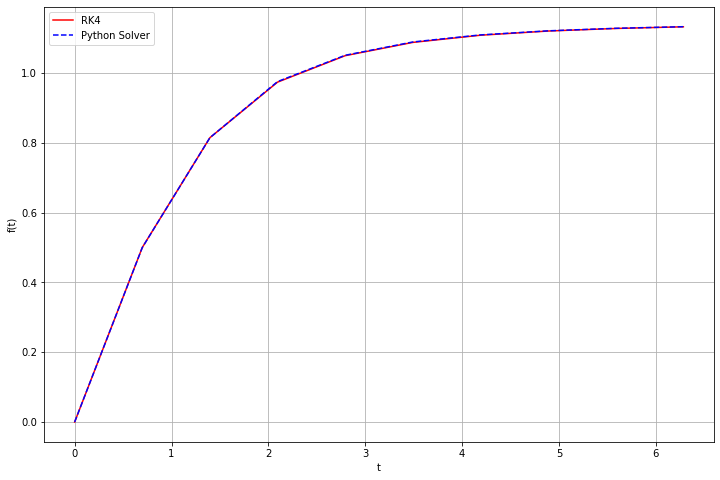

In [3]:
f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

# Runge-Kutta method
t, s = my_RK4(f, t_span, s0)

#python解
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)

#畫圖
plt.figure(figsize = (12, 8))
plt.plot(t_span, s, label = "RK4", color='red')
plt.plot(sol.t, sol.y[0], label = "Python Solver", color='blue',linestyle="--")

#標示x,y軸名稱
plt.xlabel("t")
plt.ylabel("f(t)")

#圖形格線
plt.grid()

#legend 位於右上
plt.legend(loc="upper left") 

plt.show()